In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
(x_train_image,y_train_label),(x_test_image,y_test_label) = tf.keras.datasets.cifar10.load_data()
x_train_normalize = x_train_image.astype('float32')/255
x_test_normalize = x_test_image.astype('float32')/255
y_train_OneHot = tf.keras.utils.to_categorical(y_train_label)
y_test_OneHot = tf.keras.utils.to_categorical(y_test_label)

In [3]:
def Conv2d_BN(x,filter,kernel_size,strides=(1,1)):
    x = keras.layers.Conv2D(filter,kernel_size,padding='same',strides=strides,activation='relu')(x)
    x = keras.layers.BatchNormalization(axis=3)(x)
    return x

In [4]:
def Inception(x,filter):
    branch1x1 = Conv2d_BN(x,filter,(1,1),strides=(1,1))
 
    branch1x1 = Conv2d_BN(x,filter,(1,1), strides=(1,1))
    branch3x3 = Conv2d_BN(branch1x1,filter,(3,3), strides=(1,1))
 
    branch1x1 = Conv2d_BN(x,filter,(1,1),strides=(1,1))
    branch5x5 = Conv2d_BN(branch1x1,filter,(1,1),strides=(1,1))
 
    branch3x3_pooling = keras.layers.MaxPooling2D(pool_size=(3,3),strides=(1,1),padding='same')(x)
    branch1x1_pooling = Conv2d_BN(branch3x3_pooling,filter,(1,1),strides=(1,1))
 
    x = keras.layers.concatenate([branch1x1,branch3x3,branch5x5,branch1x1_pooling],axis=3)
 
    return x

In [5]:
input = keras.layers.Input(shape=(32,32,3))
x = Conv2d_BN(input,64,(7,7),strides=(2,2))
x = keras.layers.MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x)
x = Conv2d_BN(x,192,(3,3),strides=(1,1))
x = keras.layers.MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x)
x = Inception(x,64)
x = Inception(x,120)
x = keras.layers.MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x)
x = Inception(x,128)
x = Inception(x,128)
x = Inception(x,128)
x = Inception(x,132)
x = Inception(x,208)
x = keras.layers.MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x)
x = Inception(x,208)
x = Inception(x,256)
x = keras.layers.AveragePooling2D(pool_size=(7,7),strides=(1,1),padding='same')(x)
x = keras.layers.Dropout(0.4)(x)
x = keras.layers.Dense(1000,activation='relu')(x)
x = keras.layers.Dense(10,activation='softmax')(x)
x = tf.squeeze(x,axis=1)
x = tf.squeeze(x,axis=1)

In [6]:
model = keras.models.Model(input,x,name='inception')
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_train = model.fit(x=x_train_normalize,y=y_train_OneHot,validation_split=0.2,epochs=10,batch_size=300,verbose=1)

Epoch 1/10
134/134 [==============================] - 10s 75ms/step - loss: 2.1741 - accuracy: 0.2682 - val_loss: 2.8829 - val_accuracy: 0.0965
Epoch 2/10
134/134 [==============================] - 8s 61ms/step - loss: 1.7068 - accuracy: 0.3910 - val_loss: 2.7857 - val_accuracy: 0.1335
Epoch 3/10
134/134 [==============================] - 8s 61ms/step - loss: 1.5154 - accuracy: 0.4531 - val_loss: 2.2336 - val_accuracy: 0.3099
Epoch 4/10
134/134 [==============================] - 8s 61ms/step - loss: 1.4027 - accuracy: 0.4961 - val_loss: 2.0998 - val_accuracy: 0.3356
Epoch 5/10
134/134 [==============================] - 8s 61ms/step - loss: 1.3103 - accuracy: 0.5345 - val_loss: 2.4367 - val_accuracy: 0.3578
Epoch 6/10
134/134 [==============================] - 8s 61ms/step - loss: 1.2327 - accuracy: 0.5647 - val_loss: 2.0328 - val_accuracy: 0.3732
Epoch 7/10
134/134 [==============================] - 8s 61ms/step - loss: 1.1777 - accuracy: 0.5860 - val_loss: 1.6155 - val_accuracy: 0.439

In [ ]:
model = keras.models.Model(input,x,name='inception')
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_train=model.fit(x=x_train_normalize,y=y_train_OneHot,validation_split=0.2,epochs=10,batch_size=300,verbose=1)


In [7]:
def train_history(model_train,train,val):
    plt.plot(model_train.history[train])
    plt.plot(model_train.history[val])
    plt.title('Train History')
    plt.xlabel('epoch')
    plt.ylabel(train)
    plt.legend(['train','validation'],loc='upper left')

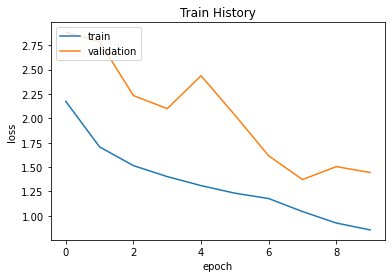

In [8]:
train_history(model_train,'loss','val_loss')

In [9]:
scores = model.evaluate(x_test_normalize,y_test_OneHot,verbose=2)

313/313 - 2s - loss: 1.4627 - accuracy: 0.5239
